In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("marketing.xlsx")

In [3]:
df

,Unnamed: 0,youtube,facebook,newspaper,sales
0,1,276.12,45.36,83.04,26.52
1,2,53.40,47.16,54.12,12.48
2,3,20.64,55.08,83.16,11.16
3,4,181.80,49.56,70.20,22.20
4,5,216.96,12.96,70.08,15.48
...,...,...,...,...,...
195,196,45.84,4.44,16.56,9.12
196,197,113.04,5.88,9.72,11.64
197,198,212.40,11.16,7.68,15.36
198,199,340.32,50.40,79.44,30.60


In [4]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
df.shape

(200, 4)

In [6]:
df.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [7]:
ss=df[df["newspaper"]>=110].index

In [8]:
df.drop(ss,inplace=True)

In [9]:
x=df.drop(columns=["sales"])

In [10]:
x

,youtube,facebook,newspaper
0,276.12,45.36,83.04
1,53.40,47.16,54.12
2,20.64,55.08,83.16
3,181.80,49.56,70.20
4,216.96,12.96,70.08
...,...,...,...
195,45.84,4.44,16.56
196,113.04,5.88,9.72
197,212.40,11.16,7.68
198,340.32,50.40,79.44


In [11]:
y=df[["sales"]]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
xtrain.shape

(148, 3)

In [15]:
xtest.shape

(50, 3)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

In [18]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [19]:
prd=lr.predict(xtest)

In [20]:
recd=ytest-prd

In [21]:
import seaborn as sn

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13540\1392322317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(recd)


<Axes: ylabel='Density'>

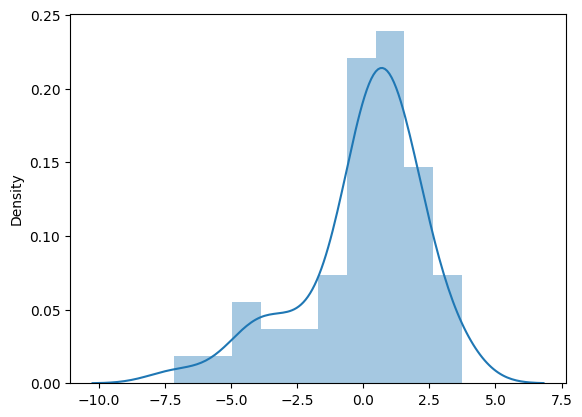

In [22]:
sn.distplot(recd)

In [23]:
import statsmodels.api as sm

In [24]:
x1=sm.add_constant(x)

In [25]:
x1.head()

,const,youtube,facebook,newspaper
0,1.0,276.12,45.36,83.04
1,1.0,53.40,47.16,54.12
2,1.0,20.64,55.08,83.16
3,1.0,181.80,49.56,70.20
4,1.0,216.96,12.96,70.08


In [26]:
mod=sm.OLS(y,x1).fit()

In [27]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           8.35e-95
Time:                        18:58:09   Log-Likelihood:                -419.34
No. Observations:                 198   AIC:                             846.7
Df Residuals:                     194   BIC:                             859.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5428      0.382      9.280      0.0

In [28]:
a=mod.resid

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13540\3202104138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(a)


<Axes: ylabel='Density'>

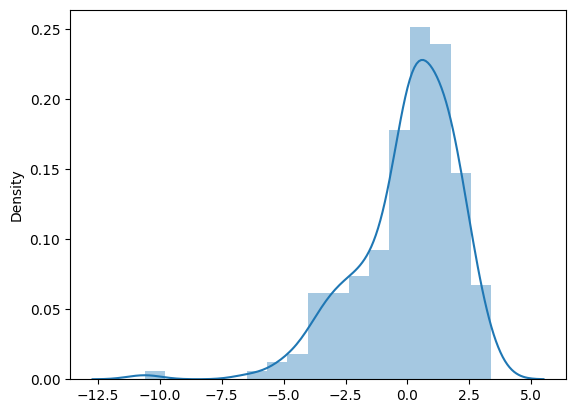

In [29]:
sn.distplot(a)

In [30]:
df.describe()

,youtube,facebook,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,176.026061,27.756970,35.732727,16.776970
std,102.531865,17.834533,24.535564,6.235317
min,0.840000,0.000000,0.360000,1.920000
25%,89.760000,11.910000,15.180000,12.390000
50%,179.700000,26.880000,30.720000,15.480000
75%,262.170000,43.590000,52.860000,20.850000
max,352.320000,59.520000,107.280000,32.400000


In [31]:
df.agg(["mean","std"])

,youtube,facebook,newspaper,sales
mean,176.026061,27.756970,35.732727,16.776970
std,102.531865,17.834533,24.535564,6.235317


In [32]:
df["newspaper"].quantile(0.25)

15.18